In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import time
from datetime import timedelta
from scipy import misc
import imageio
from skimage.transform import resize
import cv2

%matplotlib inline

# Load data

In [2]:
def load_data(PATH):
    
    def load_images(filenames):
#         print(filenames[0])
#         test = imageio.imread(filenames[0])
#         print(test.shape)
        #images = np.array([imageio.imread(filename) for filename in filenames])
#         for filename in filenames:
#             print(filename)
#             imageio.imread(filename)
        # print(images.shape)
        images = np.array([imageio.imread(filename) for filename in filenames])
        return images 

    default_dir = os.getcwd()
    os.chdir(PATH)

    main_dir = os.getcwd()
    print("main_dir" + main_dir)
    sets = os.listdir()
    
    os.chdir(sets[0])

    classes = os.listdir()

    train_dir = os.getcwd()
   


    train_X = [] 
    train_Y = [] 

     
    for i in range(len(classes)):
        os.chdir(classes[i])
        filenames = os.listdir()
        
        
        train_X.append(load_images(filenames)) 
        train_Y.append(np.full((train_X[-1].shape[0], 1), i))
        os.chdir(train_dir)
        
    os.chdir(main_dir)
    os.chdir(sets[1]) 
    test_dir = os.getcwd()
    print(train_X[2].shape)
    test_X = []
    test_Y = []

    for i in range(len(classes)):
        os.chdir(classes[i])
        filenames = os.listdir()
#         print(filenames)
        print(os.getcwd())
        test_X.append(load_images(filenames)) 
        test_Y.append(np.full((test_X[-1].shape[0], 1), i))
        os.chdir(test_dir)
    
    
    os.chdir(default_dir)
    
   # print(train_X))
    print(train_X[0].shape)
    train_X = np.concatenate((train_X[0], train_X[1], train_X[2]), axis=0)
    print(train_X.shape)
    train_Y = np.concatenate((train_Y), axis=0)
    
    print(test_X[2].shape)
    test_X = np.concatenate((test_X[0], test_X[1], test_X[2]), axis=0)
    print(test_X.shape)
    test_Y = np.concatenate((test_Y), axis=0)

    
    
    index = 43
    
    plt.imshow(test_X[index], cmap='gray')
    plt.title(test_Y[index])
    plt.show()

    os.chdir(default_dir)
    
    return train_X, train_Y, test_X, test_Y 


In [3]:
PATH = 'rps/'

main_dir/home/paperspace/hand_gesture_recognition_using_raspberrypi/rps
(101, 64, 64)
/home/paperspace/hand_gesture_recognition_using_raspberrypi/rps/train/scissors
/home/paperspace/hand_gesture_recognition_using_raspberrypi/rps/train/paper
/home/paperspace/hand_gesture_recognition_using_raspberrypi/rps/train/rock
(101, 64, 64)
(303, 64, 64)
(1900, 64, 64)
(5700, 64, 64)


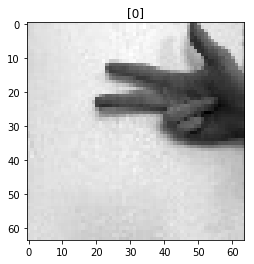

In [4]:
test_X, test_Y_class, train_X, train_Y_class = load_data(PATH)

In [5]:
img_size = 64

img_size_flat = img_size * img_size

img_shape = (img_size, img_size)

num_channels = 1

num_classes = 3

In [15]:
def plot_images(images, true_class, pred_class=None):
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    def className(cls):
        output = ''
        if cls == 0:
            output = 'Nuzky'
        elif cls == 1:
            output = 'Papir'
        elif cls == 2:
            output = 'Kamen'
      
        return output
        
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(images[i].reshape(img_size, img_size), cmap='gray')
        
        
        
        if pred_class is None:
            xlabel = f"{className(true_class[i][0])}"
        else:
            xlabel = f"True: {true_class[i]}, Pred: {pred_class[i]}"
        
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()   

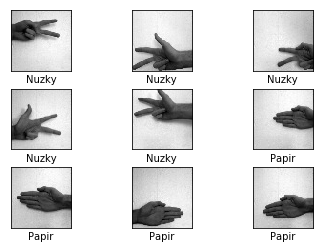

In [34]:
index = 1895

images = train_X[index:index+10]

true_class = train_Y_class[index:index+10]

plot_images(images=images, true_class=true_class)

In [8]:
def preprocess_images(X):
    X = (X / 255 * 0.99) + 0.01
    return np.float32(X).reshape(-1, img_size, img_size, num_channels)

def one_hot(nums):
    output = np.eye(num_classes)[nums]
    return np.squeeze(output)

def flip_horizontally(imgs):
    flipped = np.array([np.fliplr(img) for img in imgs])
    print(flipped.shape)
    return flipped

def flip_vertically(imgs):
    flipped = np.array([np.flipud(img) for img in imgs])
    print(flipped.shape)
    return flipped


In [9]:
train_hor = flip_horizontally(train_X)

test_hor = flip_horizontally(test_X)

# train_X = np.concatenate((train_X, train_hor), axis=0)
# train_Y_class = np.concatenate((train_Y_class, train_Y_class), axis=0)


# test_X = np.concatenate((test_X, test_hor), axis=0)
# test_Y_class = np.concatenate((test_Y_class, test_Y_class), axis=0)

train_X = preprocess_images(train_X)
test_X = preprocess_images(test_X)

train_Y = one_hot(train_Y_class)
test_Y = one_hot(test_Y_class)


print(f"Number of train examples: {train_X.shape[0]}")
print(f"Number of test examples: {test_X.shape[0]}")
print(f"Train images shape: {train_X.shape}")
print(f"Test images shape: {test_X.shape}")
print(f"Train Labels shape: {train_Y.shape}")
print(f"Test Labels shape: {test_Y.shape}")

(5700, 64, 64)
(303, 64, 64)
Number of train examples: 5700
Number of test examples: 303
Train images shape: (5700, 64, 64, 1)
Test images shape: (303, 64, 64, 1)
Train Labels shape: (5700, 3)
Test Labels shape: (303, 3)


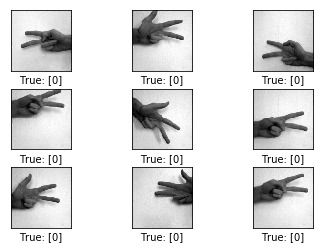

In [10]:

index = 150

images = train_X[index:index+10]

true_class = train_Y_class[index:index+10]

plot_images(images=images, true_class=true_class)

(5700, 64, 64, 1)


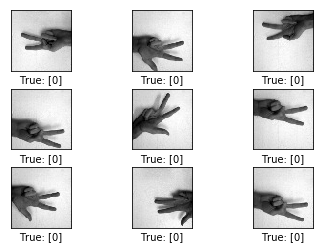

In [11]:
index = 150

images = flip_vertically(train_X)[index:index+10]

true_class = train_Y_class[index:index+10]

plot_images(images=images, true_class=true_class)

(5700, 64, 64, 1)


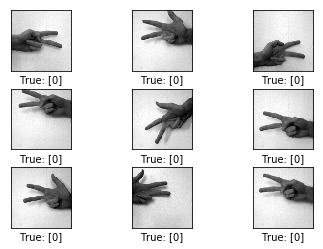

In [12]:
index = 150

images = flip_horizontally(train_X)[index:index+10]

true_class = train_Y_class[index:index+10]

plot_images(images=images, true_class=true_class)

(5700, 64, 64, 1)
(5700, 64, 64, 1)


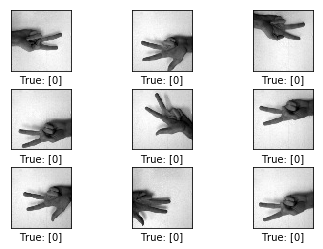

In [13]:
index = 150

images = flip_horizontally(flip_vertically(train_X))[index:index+10]

true_class = train_Y_class[index:index+10]

plot_images(images=images, true_class=true_class)

In [14]:
# 1 / 0

# Model

## Conv net hyper parameters

In [15]:
filter_size1 = 3
num_filters1 = 8

filter_size2 = 3
num_filters2 = 16

filter_size3 = 3
num_filters3 = 32

# filter_size4 = 3
# num_filters4 = 128

fc_layer = 512

lr=0.0005

## Conv layer

In [16]:
def create_conv_layer(input, num_input_channels, filter_size, num_filters, use_pooling=True):
    
    filter_shape = [filter_size, filter_size, num_input_channels, num_filters]
    
    print(filter_shape)
    
    weights = tf.Variable(tf.truncated_normal(shape=filter_shape))
    
    biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))
    
    layer = tf.nn.conv2d(input=input,
                        filter=weights,
                        strides=[1, 1, 1, 1],
                         padding='SAME')
    
    layer += biases
    
    if use_pooling:
        
        layer = tf.nn.max_pool(value=layer,
                              ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
        
    layer = tf.nn.relu(layer)
    
    return layer, weights

## FC layer

In [17]:
def create_fully_connected(input,
                          num_inputs,
                          num_outputs,
                          use_relu=True):
    
    weights = tf.Variable(tf.truncated_normal(shape=[num_inputs, num_outputs]))
    
    biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
    
    layer = tf.matmul(input, weights) + biases
    
    if use_relu:
        layer = tf.nn.relu(layer)
        
    return layer

## Flatten conv layer

In [18]:
def flatten_layer(layer):
    
    layer_shape = layer.get_shape()
    
    num_features = layer_shape[1:4].num_elements()
    
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    return layer_flat, num_features

## Placeholders

In [19]:
x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')

## Conv 1

In [20]:
layer_conv1, weights_conv1 = create_conv_layer(input=x,
                                              num_input_channels=num_channels,
                                              filter_size=filter_size1,
                                              num_filters=num_filters1,
                                              use_pooling=True)

[3, 3, 1, 8]


## Conv 2

In [21]:
layer_conv2, weights_conv2 = create_conv_layer(input=layer_conv1,
                                              num_input_channels=num_filters1,
                                              filter_size=filter_size2,
                                              num_filters=num_filters2,
                                              use_pooling=True)

[3, 3, 8, 16]


In [22]:
layer_conv3, weights_conv3 = create_conv_layer(input=layer_conv2,
                                              num_input_channels=num_filters2,
                                              filter_size=filter_size3,
                                              num_filters=num_filters3,
                                              use_pooling=True)

[3, 3, 16, 32]


## FC1

In [23]:
layer_flat, num_features = flatten_layer(layer_conv3)
print(f"Num features: {num_features}")

Num features: 2048


In [24]:
fc_layer1 = create_fully_connected(input=layer_flat,
                                  num_inputs=num_features,
                                  num_outputs=fc_layer,
                                  use_relu=True)

In [25]:
fc_layer1

<tf.Tensor 'Relu_3:0' shape=(?, 512) dtype=float32>

In [26]:
dropout = tf.layers.dropout(inputs=fc_layer1, rate=0.2, training=True)

In [27]:
dropout

<tf.Tensor 'dropout/dropout/mul:0' shape=(?, 512) dtype=float32>

In [28]:
fc_layer2 = create_fully_connected(input=dropout,
                                  num_inputs=fc_layer,
                                  num_outputs=num_classes,
                                  use_relu=False)

In [29]:
fc_layer2

<tf.Tensor 'add_4:0' shape=(?, 3) dtype=float32>

## Softmax

In [30]:
y_pred = tf.nn.softmax(fc_layer2)
y_pred_class = tf.argmax(y_pred, axis=1)

In [31]:
y_pred_class

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [32]:
train_Y_class.reshape(-1).shape

(5700,)

## Cost

In [33]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=fc_layer2, labels=y)

In [34]:
cost = tf.reduce_mean(cross_entropy)

## Optimizer

In [35]:
optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

## Accuracy

In [36]:
correct_predictions = tf.equal(y_pred_class, train_Y_class.reshape(-1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

## Saver

In [37]:
saver = tf.train.Saver()

In [58]:
save_dir = 'checkpoints/rpc1/'

## Running Tensorflow session

In [39]:
session = tf.Session()

In [40]:
session.run(tf.global_variables_initializer())

## Minibatch helper function

In [41]:
batch_size = 256

In [42]:
def split_into_batches(X, Y):
    full_sized = math.floor(X.shape[0] / batch_size)
    print(f"Full sized: {full_sized}")
    batches_X = []
    batches_Y = []
    
    for i in range(full_sized):
        batches_X.append(X[i*batch_size:(i+1) * batch_size])
        batches_Y.append(Y[i*batch_size:(i+1) * batch_size])
        
        
    last_elems = full_sized * batch_size - X.shape[0]
    if last_elems != 0:
        print(f"kasel")
        batches_X.append(X[last_elems:])
        batches_Y.append(Y[last_elems:])
        
    return batches_X, batches_Y
    
    

In [43]:
%%time
print("kasel")

kasel
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 76.1 µs


In [44]:
total_epochs = 0
def optimize(num_epochs):
     
    global total_epochs
    start_time = time.time()
    
    for i in range(total_epochs, total_epochs + num_epochs):
        
        for x_batch, y_batch in zip(X_batches, Y_batches):
            
            feed_dict_train = {x: x_batch,
                              y: y_batch}
            
#             print(feed_dict_train[x].shape)
#             print(feed_dict_train[y].shape)
            
            session.run(optimizer, feed_dict=feed_dict_train)
#             print(":)")
        
#             feed_dict_train_acc = {x: train_X, y: train_Y}
#             acc = session.run(accuracy, feed_dict=feed_dict_train_acc)
    
        print(f"Epoch {i}: Train_acc: {str(100)[:5]}% Test accuracy: {str(print_accuracy(test_X, test_Y) * 100)[:5]}%")
        
    total_epochs += num_epochs
    
    end_time = time.time()
    
    time_dif = end_time - start_time
    
    print(f"Time usage: {timedelta(seconds=int(round(time_dif)))}")
    print(f"Test accuracy: {str(print_accuracy(test_X, test_Y) * 100)[:5]}%")

In [45]:
def print_accuracy(X, Y):
    feed_dict_test = {x: X,
                     y: Y}
    
#     print(feed_dict_test[x].shape)
#     print(feed_dict_test[y].shape)
    
    pred_class = session.run(y_pred_class, feed_dict=feed_dict_test)
    
#     print(pred_class.shape)
    
    true_class = np.argmax(Y, axis=1)
#     print(str(pred_class.shape) + "||" + str(true_class.shape))
    pred_class = np.array(pred_class)
    correct = (pred_class == true_class)
    
#     print(correct)
    correct_sum = correct.sum()
    
    acc = float(correct_sum) / len(correct)
    
    return acc
    print(f"Test accuracy: {str(acc * 100)[:5]}%")

# Training

In [46]:
X_batches, Y_batches = split_into_batches(train_X, train_Y)

Full sized: 22
kasel


In [47]:
print(test_X.shape)

(303, 64, 64, 1)


In [48]:
# print(f"Test accuracy: {str(print_accuracy(test_X, test_Y) * 100)[:5]}%")
# print(f"Train accuracy: {str(print_accuracy(train_X, train_Y) * 100)[:5]}%")

In [49]:
optimize(num_epochs=1)

Epoch 0: Train_acc: 100% Test accuracy: 36.96%
Time usage: 0:00:01
Test accuracy: 37.95%


In [50]:
optimize(num_epochs=5)

Epoch 1: Train_acc: 100% Test accuracy: 33.00%
Epoch 2: Train_acc: 100% Test accuracy: 36.63%
Epoch 3: Train_acc: 100% Test accuracy: 35.64%
Epoch 4: Train_acc: 100% Test accuracy: 44.88%
Epoch 5: Train_acc: 100% Test accuracy: 40.59%
Time usage: 0:00:02
Test accuracy: 43.89%


In [51]:
optimize(num_epochs=10)

Epoch 6: Train_acc: 100% Test accuracy: 40.92%
Epoch 7: Train_acc: 100% Test accuracy: 43.89%
Epoch 8: Train_acc: 100% Test accuracy: 42.57%
Epoch 9: Train_acc: 100% Test accuracy: 53.79%
Epoch 10: Train_acc: 100% Test accuracy: 47.19%
Epoch 11: Train_acc: 100% Test accuracy: 50.49%
Epoch 12: Train_acc: 100% Test accuracy: 51.81%
Epoch 13: Train_acc: 100% Test accuracy: 49.50%
Epoch 14: Train_acc: 100% Test accuracy: 54.45%
Epoch 15: Train_acc: 100% Test accuracy: 54.45%
Time usage: 0:00:03
Test accuracy: 52.80%


In [52]:
optimize(num_epochs=20)

Epoch 16: Train_acc: 100% Test accuracy: 57.75%
Epoch 17: Train_acc: 100% Test accuracy: 53.46%
Epoch 18: Train_acc: 100% Test accuracy: 60.72%
Epoch 19: Train_acc: 100% Test accuracy: 58.74%
Epoch 20: Train_acc: 100% Test accuracy: 58.74%
Epoch 21: Train_acc: 100% Test accuracy: 62.37%
Epoch 22: Train_acc: 100% Test accuracy: 59.73%
Epoch 23: Train_acc: 100% Test accuracy: 62.37%
Epoch 24: Train_acc: 100% Test accuracy: 64.02%
Epoch 25: Train_acc: 100% Test accuracy: 66.99%
Epoch 26: Train_acc: 100% Test accuracy: 69.63%
Epoch 27: Train_acc: 100% Test accuracy: 70.95%
Epoch 28: Train_acc: 100% Test accuracy: 73.26%
Epoch 29: Train_acc: 100% Test accuracy: 70.29%
Epoch 30: Train_acc: 100% Test accuracy: 73.26%
Epoch 31: Train_acc: 100% Test accuracy: 74.58%
Epoch 32: Train_acc: 100% Test accuracy: 74.91%
Epoch 33: Train_acc: 100% Test accuracy: 73.59%
Epoch 34: Train_acc: 100% Test accuracy: 73.59%
Epoch 35: Train_acc: 100% Test accuracy: 72.27%
Time usage: 0:00:07
Test accuracy: 79.53

In [53]:
optimize(num_epochs=40)

Epoch 36: Train_acc: 100% Test accuracy: 74.25%
Epoch 37: Train_acc: 100% Test accuracy: 80.19%
Epoch 38: Train_acc: 100% Test accuracy: 78.21%
Epoch 39: Train_acc: 100% Test accuracy: 77.88%
Epoch 40: Train_acc: 100% Test accuracy: 80.19%
Epoch 41: Train_acc: 100% Test accuracy: 81.51%
Epoch 42: Train_acc: 100% Test accuracy: 78.87%
Epoch 43: Train_acc: 100% Test accuracy: 83.16%
Epoch 44: Train_acc: 100% Test accuracy: 84.48%
Epoch 45: Train_acc: 100% Test accuracy: 84.48%
Epoch 46: Train_acc: 100% Test accuracy: 85.14%
Epoch 47: Train_acc: 100% Test accuracy: 82.83%
Epoch 48: Train_acc: 100% Test accuracy: 85.14%
Epoch 49: Train_acc: 100% Test accuracy: 85.47%
Epoch 50: Train_acc: 100% Test accuracy: 87.45%
Epoch 51: Train_acc: 100% Test accuracy: 86.46%
Epoch 52: Train_acc: 100% Test accuracy: 87.45%
Epoch 53: Train_acc: 100% Test accuracy: 86.79%
Epoch 54: Train_acc: 100% Test accuracy: 87.78%
Epoch 55: Train_acc: 100% Test accuracy: 88.77%
Epoch 56: Train_acc: 100% Test accuracy:

In [54]:
optimize(num_epochs=40)

Epoch 76: Train_acc: 100% Test accuracy: 91.74%
Epoch 77: Train_acc: 100% Test accuracy: 93.39%
Epoch 78: Train_acc: 100% Test accuracy: 94.71%
Epoch 79: Train_acc: 100% Test accuracy: 95.70%
Epoch 80: Train_acc: 100% Test accuracy: 94.38%
Epoch 81: Train_acc: 100% Test accuracy: 95.04%
Epoch 82: Train_acc: 100% Test accuracy: 93.39%
Epoch 83: Train_acc: 100% Test accuracy: 94.71%
Epoch 84: Train_acc: 100% Test accuracy: 95.04%
Epoch 85: Train_acc: 100% Test accuracy: 96.69%
Epoch 86: Train_acc: 100% Test accuracy: 97.02%
Epoch 87: Train_acc: 100% Test accuracy: 97.35%
Epoch 88: Train_acc: 100% Test accuracy: 95.70%
Epoch 89: Train_acc: 100% Test accuracy: 95.04%
Epoch 90: Train_acc: 100% Test accuracy: 97.02%
Epoch 91: Train_acc: 100% Test accuracy: 96.03%
Epoch 92: Train_acc: 100% Test accuracy: 94.71%
Epoch 93: Train_acc: 100% Test accuracy: 97.35%
Epoch 94: Train_acc: 100% Test accuracy: 96.69%
Epoch 95: Train_acc: 100% Test accuracy: 96.36%
Epoch 96: Train_acc: 100% Test accuracy:

In [55]:
optimize(num_epochs=100)

Epoch 116: Train_acc: 100% Test accuracy: 96.69%
Epoch 117: Train_acc: 100% Test accuracy: 98.67%
Epoch 118: Train_acc: 100% Test accuracy: 98.01%
Epoch 119: Train_acc: 100% Test accuracy: 97.35%
Epoch 120: Train_acc: 100% Test accuracy: 98.34%
Epoch 121: Train_acc: 100% Test accuracy: 98.34%
Epoch 122: Train_acc: 100% Test accuracy: 97.68%
Epoch 123: Train_acc: 100% Test accuracy: 98.01%
Epoch 124: Train_acc: 100% Test accuracy: 98.01%
Epoch 125: Train_acc: 100% Test accuracy: 98.01%
Epoch 126: Train_acc: 100% Test accuracy: 98.01%
Epoch 127: Train_acc: 100% Test accuracy: 98.34%
Epoch 128: Train_acc: 100% Test accuracy: 97.68%
Epoch 129: Train_acc: 100% Test accuracy: 99.00%
Epoch 130: Train_acc: 100% Test accuracy: 97.02%
Epoch 131: Train_acc: 100% Test accuracy: 98.67%
Epoch 132: Train_acc: 100% Test accuracy: 97.68%
Epoch 133: Train_acc: 100% Test accuracy: 98.34%
Epoch 134: Train_acc: 100% Test accuracy: 97.68%
Epoch 135: Train_acc: 100% Test accuracy: 97.35%
Epoch 136: Train_acc

KeyboardInterrupt: 

In [56]:
optimize(num_epochs=10)

Epoch 116: Train_acc: 100% Test accuracy: 99.66%
Epoch 117: Train_acc: 100% Test accuracy: 99.33%
Epoch 118: Train_acc: 100% Test accuracy: 98.67%
Epoch 119: Train_acc: 100% Test accuracy: 99.00%
Epoch 120: Train_acc: 100% Test accuracy: 99.66%
Epoch 121: Train_acc: 100% Test accuracy: 98.34%
Epoch 122: Train_acc: 100% Test accuracy: 99.00%
Epoch 123: Train_acc: 100% Test accuracy: 98.67%
Epoch 124: Train_acc: 100% Test accuracy: 98.34%
Epoch 125: Train_acc: 100% Test accuracy: 99.00%
Time usage: 0:00:03
Test accuracy: 100.0%


In [1]:
index = 750


images = test_X[index:index+10]

true_class = test_Y_class[index:index+10]

feed_dict_test = {x: test_X, y: test_Y}

preds = session.run(y_pred_class, feed_dict=feed_dict_test)[index:index+10]

# preds = session.run(y_pred_class, feed_dict=feed_dict_test)
# print(preds.shape)


plot_images(images=images, true_class=true_class, pred_class=preds)

NameError: name 'test_X' is not defined